In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import plotly.io as pio
import plotly.express as px

ModuleNotFoundError: No module named 'plotly'

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
pio.templates.default = "plotly_white"

In [ ]:
plt.rcParams["figure.figsize"] = (10, 7)
plt.style.use("seaborn-v0_8-colorblind")

In [ ]:
# plot_mode = ''
# plot_mode = 'svg'
plot_mode = 'png'

In [ ]:
data = pd.read_csv('merged_data.csv')

In [ ]:
# Ola's/Rowlands redshift boundry https://arxiv.org/abs/2306.05774
data = data[data['oleh_Z'] > 0.01]
data = data[data['oleh_Z'] < 0.32]
data

Unnamed: 0  sersic_CATAID   sersic_RA  sersic_DEC  sersic_R_PETRO  \
0               0           6808  174.100731    0.658922       18.813840   
2               2           6880  174.626790    0.731963       17.791588   
3               3           6881  174.633119    0.821565       16.999180   
4               4           6882  174.637921    0.738379       16.970581   
5               5           6889  174.708025    0.760713       18.116770   
...           ...            ...         ...         ...             ...   
22400       22400        4265516  129.750133    0.061317       18.858145   
22403       22403        4318311  215.361406    1.222845       20.485151   
22406       22406        4327300  216.521780    1.603229       20.629812   
22407       22407        4341320  138.955509   -0.107762       20.214370   
22408       22408        4348349  180.767584   -0.125180       18.312876   

       sersic_SURVEY_OLDCLASS  sersic_SURVEY_CLASS  sersic_CENFLUX_u  \
0                           7                    6         -0.134276   
2                           7                    6        131.201340   
3                           7                    6         94.854670   
4                           7                    6        137.007030   
5                           7                    6          8.733386   
...                       ...                  ...               ...   
22400                       3                    4         43.909573   
22403                       2                    2         26.096272   
22406                       2                    2         23.799711   
22407                       2                    2         26.149776   
22408                       3                    4         72.206140   

       sersic_BACKFLUX_u  sersic_PSFNUM_u  ...  oleh_GAMAID  oleh_SURVEY  \
0               2.705428                3  ...         6808         GAMA   
2               2.155186                6  ...         6880         GAMA   
3               2.249132                6  ...         6881         SDSS   
4               5.096498                7  ...         6882         GAMA   
5               2.324466                8  ...         6889         SDSS   
...                  ...              ...  ...          ...          ...   
22400           6.884082               20  ...      4265516         GAMA   
22403          -3.973148                9  ...      4318311         GAMA   
22406          -4.566878                5  ...      4327300         GAMA   
22407          -0.443334               28  ...      4341320         GAMA   
22408           3.693120               13  ...      4348349         GAMA   

       oleh_IS_BEST  oleh_IS_SBEST    oleh_RA  oleh_DEC    oleh_Z  oleh_BPT  \
0              True           True  174.10071   0.65891  0.229329      UNCX   
2              True           True  174.62679   0.73196  0.104836      UNCX   
3              True           True  174.63313   0.82153  0.106081      AGNX   
4              True           True  174.63792   0.73838  0.105586      AGNX   
5              True           True  174.70804   0.76070  0.311848      NOEL   
...             ...            ...        ...       ...       ...       ...   
22400          True           True  129.75012   0.06132  0.204071      NOEL   
22403          True           True  215.36142   1.22284  0.133573       SFX   
22406          True           True  216.52179   1.60323  0.124753     UNCXY   
22407          True           True  138.95550  -0.10776  0.228566      UNCY   
22408          True           True  180.76758  -0.12518  0.122590      UNCX   

       oleh_WHAN  oleh_BMS  
0             RG        -1  
2            LLR         0  
3            LLR         0  
4            LLR        -1  
5             RG        -1  
...          ...       ...  
22400        LLR        -1  
22403         SF         1  
22406         SF         1  
22407        LLR         1  
22408        UNC        -1  

[17913 rows x 419 

In [ ]:
data['przemo_s250f_to_s250ferr'] = data['lambdar_S250_flux'] / data['lambdar_S250_fluxerr']

In [ ]:
data['przemo_dust'] = np.where(data['przemo_s250f_to_s250ferr'] > 3, 'w/ dust', 'w/o dust')

In [ ]:
# redshift bins
def redshift_cat(d):
    z = d['oleh_Z']
    if z < 0.12:
        return '0.01 <= z < 0.12'
    if z < 0.25:
        return '0.12 <= z < 0.25'
    return '0.25 <= z < 0.32'

data['z_bins'] = data.apply(redshift_cat, axis=1)

In [ ]:
count_all = len(data)
count_w_dust = (data['przemo_dust'] == 'w/ dust').sum()
count_wo_dust = (data['przemo_dust'] == 'w/o dust').sum()
print('%d galaxies in total, %d with dust and %d without' % (count_all, count_w_dust, count_wo_dust))

17913 galaxies in total, 2034 with dust and 15879 without


### TODO 16 galaxies are missing in the dusty sample, compared to Ola's paper (2050 there)!

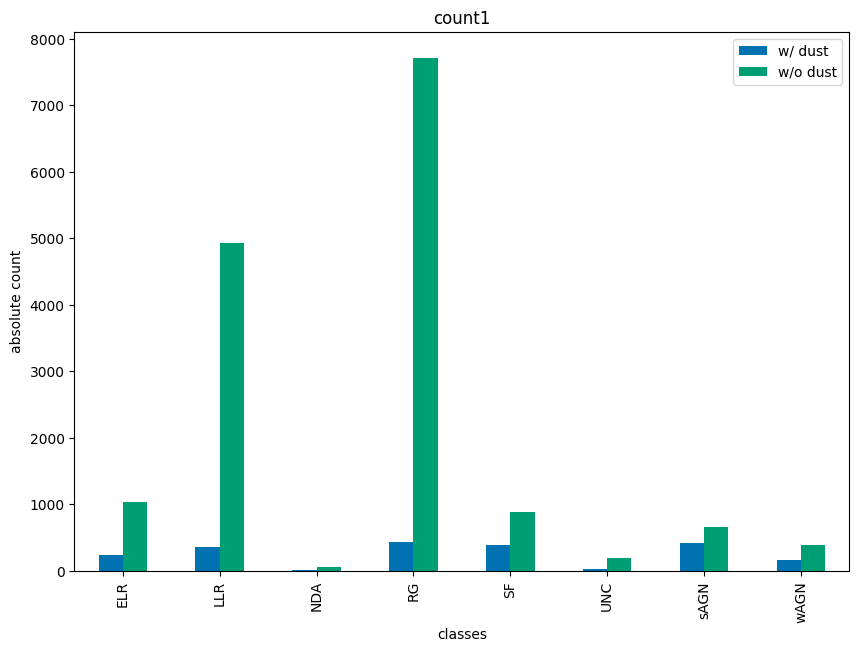

In [ ]:
ax = data.groupby(['oleh_WHAN', 'przemo_dust'])['przemo_dust'].count().unstack('przemo_dust').plot.bar(xlabel='classes', ylabel='absolute count', title='count1')
ax.legend().title = ''

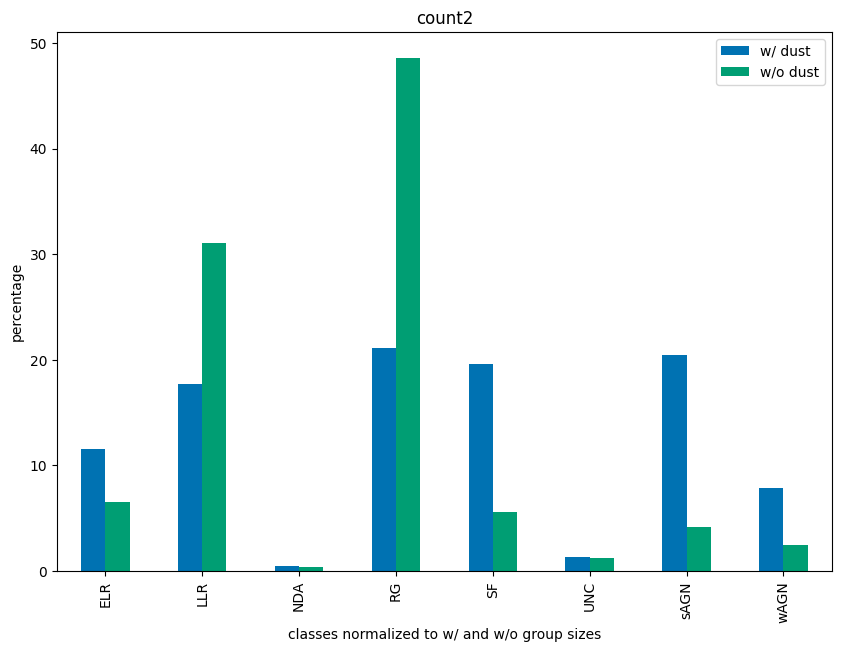

In [ ]:
x = data.groupby(['oleh_WHAN', 'przemo_dust'])['przemo_dust'].count().unstack('przemo_dust').astype('float64')
x['w/ dust'] /= count_w_dust / 100
x['w/o dust'] /= count_wo_dust / 100
ax = x.plot.bar(xlabel='classes normalized to w/ and w/o group sizes', ylabel='percentage', title='count2')
ax.legend().set_title = ''

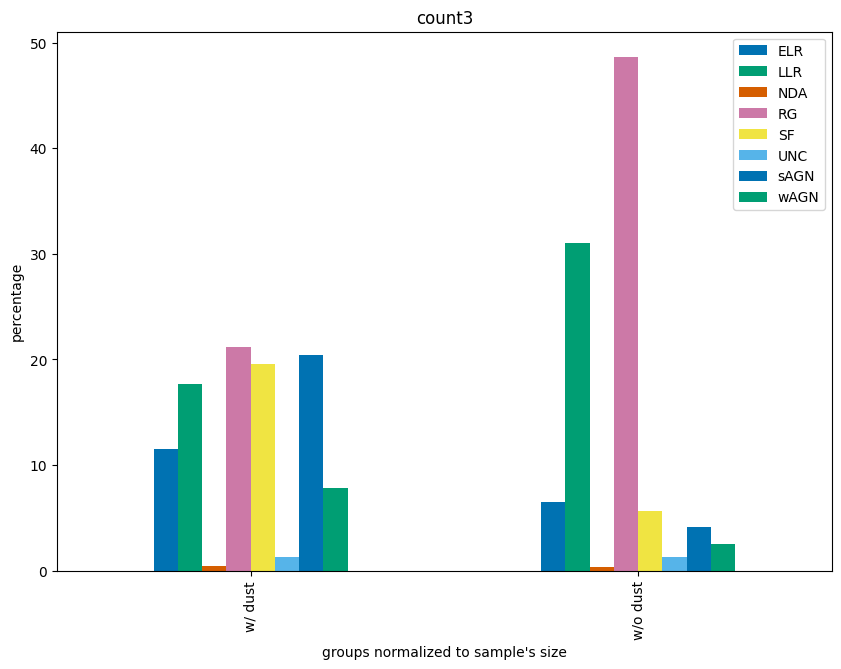

In [ ]:
y = data.groupby(['oleh_WHAN', 'przemo_dust'])['przemo_dust'].count().unstack('oleh_WHAN')

y = y.astype('float64')

dust_sum = y.iloc[0].sum()
nodust_sum = y.iloc[1].sum()

y.iloc[0] /= dust_sum / 100
y.iloc[1] /= nodust_sum / 100
ax = y.plot.bar(xlabel='groups normalized to sample\'s size', ylabel='percentage', title='count3')
ax.legend().title = ''

In [ ]:
columns_lst = ['magphys_CATAID',
               'magphys_SFR_0_1Gyr_best_fit',
               'magphys_SFR_0_1Gyr_percentile50',
               'magphys_mass_stellar_best_fit',
               'magphys_mass_stellar_percentile50',
               'magphys_tform_percentile50',
               'magphys_ager_percentile50',
               'oleh_Z', 'oleh_WHAN']

w_dust = data[data['przemo_dust'] == 'w/ dust'][columns_lst]
wo_dust = data[data['przemo_dust'] == 'w/o dust'][columns_lst]

w_dust.sort_values(by='oleh_WHAN', inplace=True)
wo_dust.sort_values(by='oleh_WHAN', inplace=True)

In [ ]:
labels = {
    'magphys_mass_stellar_best_fit': 'stellar mass best fit [M<sub>☉</sub>]',
    'magphys_mass_stellar_percentile50': 'log(M<sub>stellar</sub> / M<sub>☉</sub>)',
    'magphys_SFR_0_1Gyr_best_fit': 'SFR best fit [M<sub>☉</sub>/y]',
    'magphys_SFR_0_1Gyr_percentile50': 'log(SFR / M<sub>☉</sub> yr<sup>-1</sup>)',
    'magphys_tform_percentile50': 'median age of the oldest stars [dex(yr)]',
    'magphys_ager_percentile50': 'light-weighted age log(t<sub>r</sub> / yr) [dex(yr)] -- TODO figure out the units',
    'oleh_Z': 'z',
    'oleh_WHAN': 'WHAN class',
    'przemo_dust': 'galaxies sample',
    'z_bins': 'Z bin'
}
category_orders = {
    'z_bins': ['0.01 <= z < 0.12', '0.12 <= z < 0.25', '0.25 <= z < 0.32']
}

## SFR  *as a func of* stellar mass

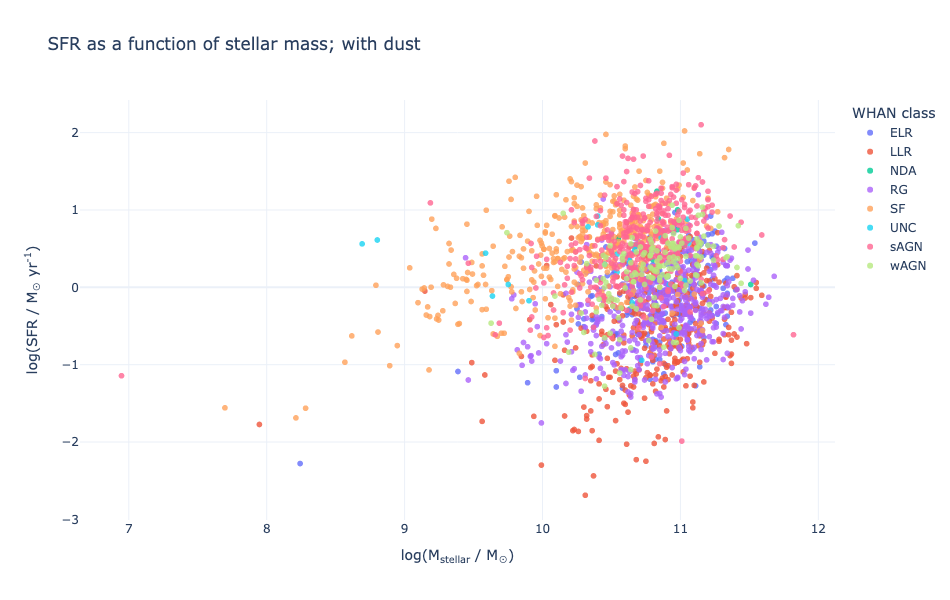

In [ ]:
fig = px.scatter(w_dust,
                 x='magphys_mass_stellar_percentile50',
                 y='magphys_SFR_0_1Gyr_percentile50',
                 color='oleh_WHAN',
                 hover_name='magphys_CATAID',
                 labels=labels,
                 title='SFR as a function of stellar mass; with dust',
                 opacity=0.8,
                 width=950,
                 height=600)
fig.show(plot_mode)

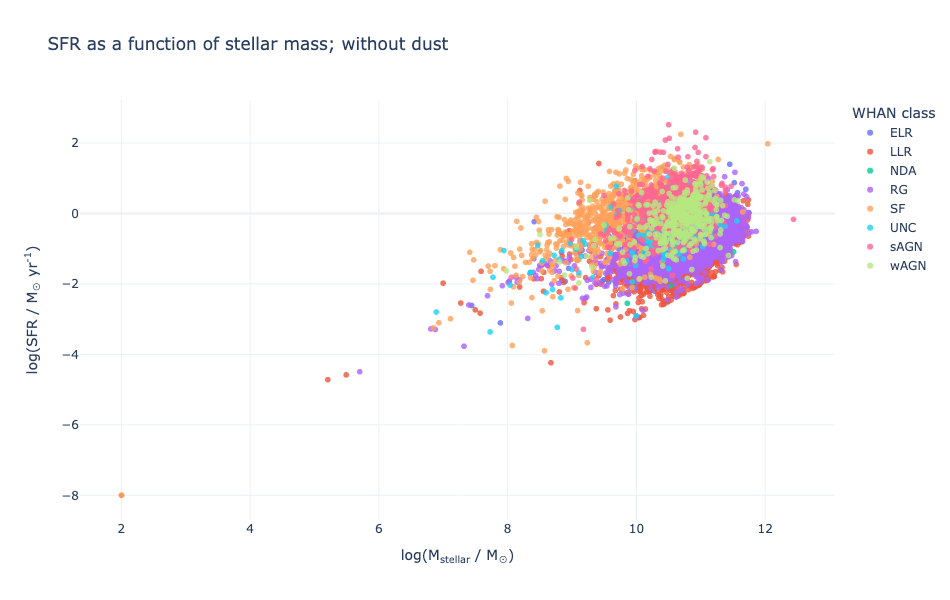

In [ ]:
fig = px.scatter(wo_dust,
                 x='magphys_mass_stellar_percentile50',
                 y='magphys_SFR_0_1Gyr_percentile50',
                 color='oleh_WHAN',
                 hover_name='magphys_CATAID',
                 labels=labels,
                 title='SFR as a function of stellar mass; without dust',
                 opacity=0.8,
                 width=950,
                 height=600)
fig.show(plot_mode)

## TODO interesting cutoff in the lower right -- see LRR below

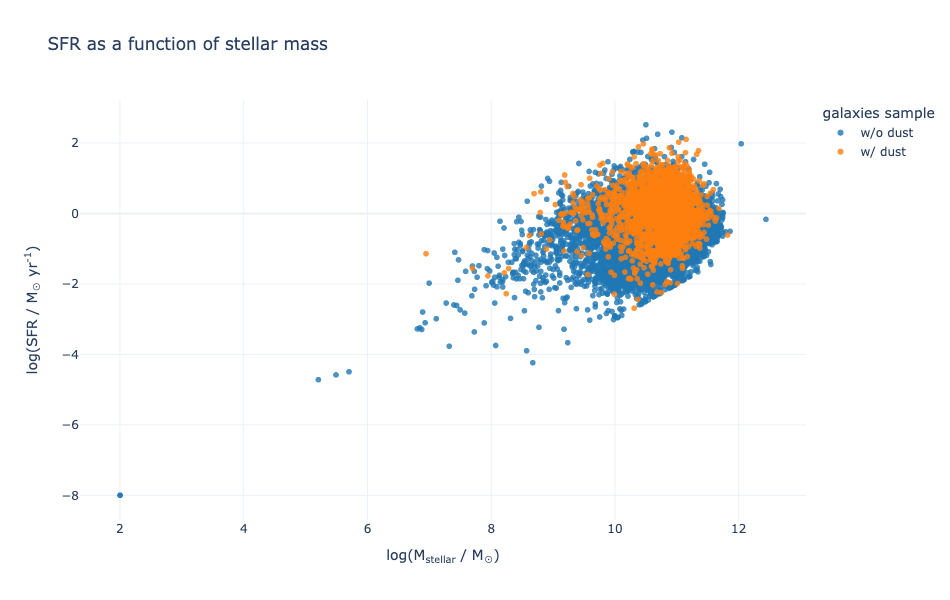

In [ ]:
fig = px.scatter(data,
                 x='magphys_mass_stellar_percentile50',
                 y='magphys_SFR_0_1Gyr_percentile50',
                 color='przemo_dust',
                 hover_name='magphys_CATAID',
                 title='SFR as a function of stellar mass',
                 labels=labels,
                 opacity=0.8,
                 width=950,
                 height=600,
                 color_discrete_sequence=px.colors.qualitative.D3)
fig.show(plot_mode)

## TODO more work here, also stellar age:

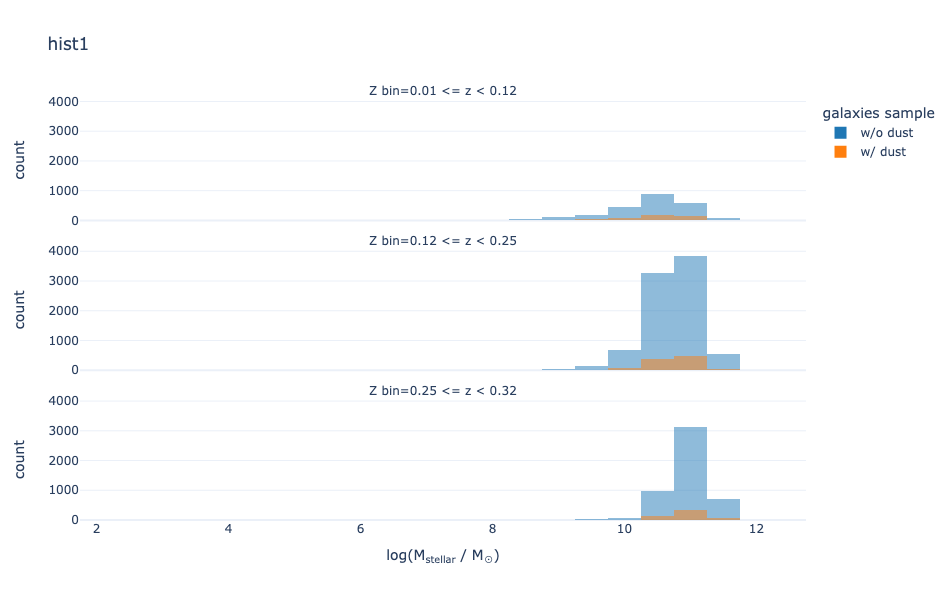

In [ ]:
fig = px.histogram(data,
                   x='magphys_mass_stellar_percentile50',
                   category_orders=category_orders,
                   labels=labels,
                   color='przemo_dust',
                   nbins=30,
                   barmode='overlay',
                   facet_col='z_bins',
                   facet_col_wrap=1,
                   width=950,
                   height=600,
                   color_discrete_sequence=px.colors.qualitative.D3,
                   title='hist1')
fig.show(plot_mode)

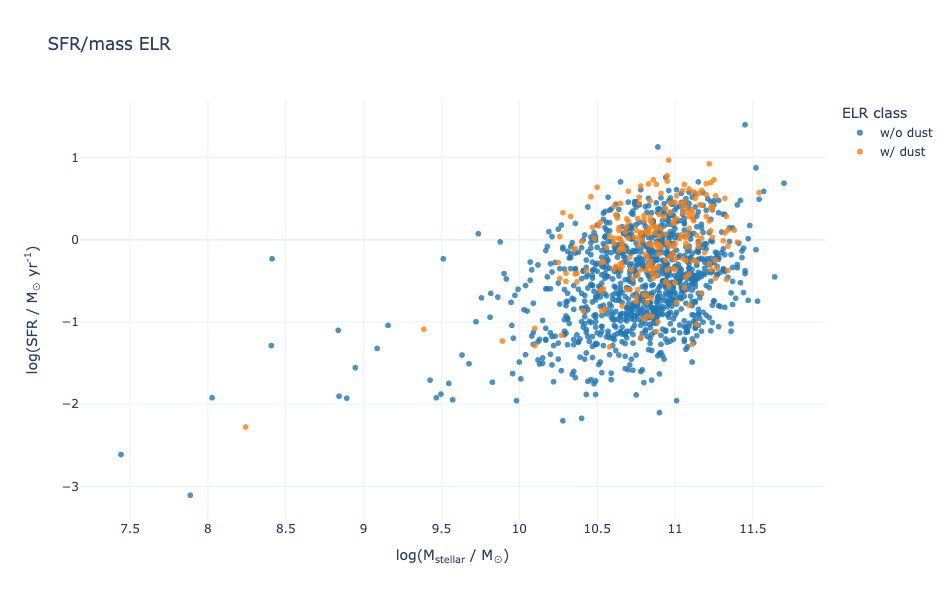

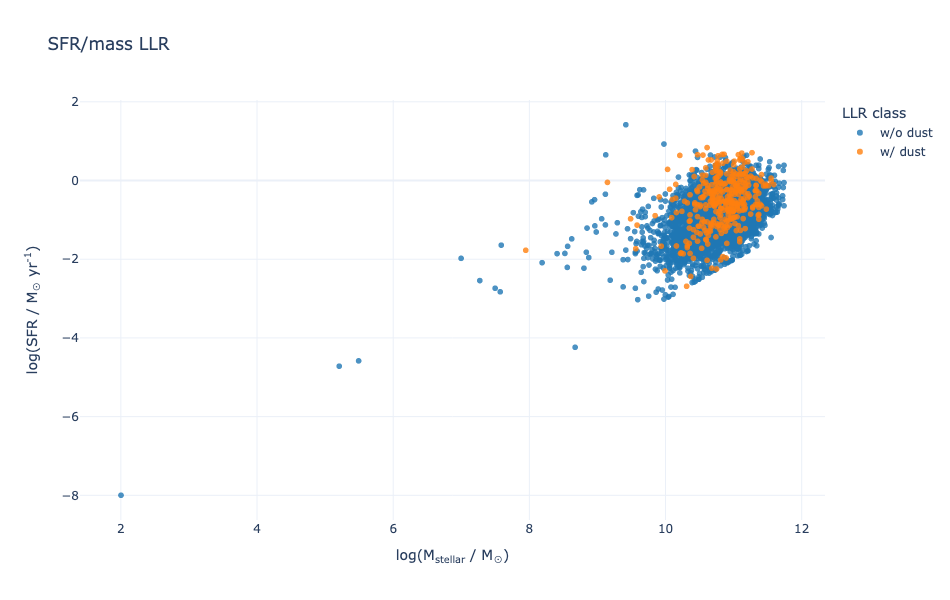

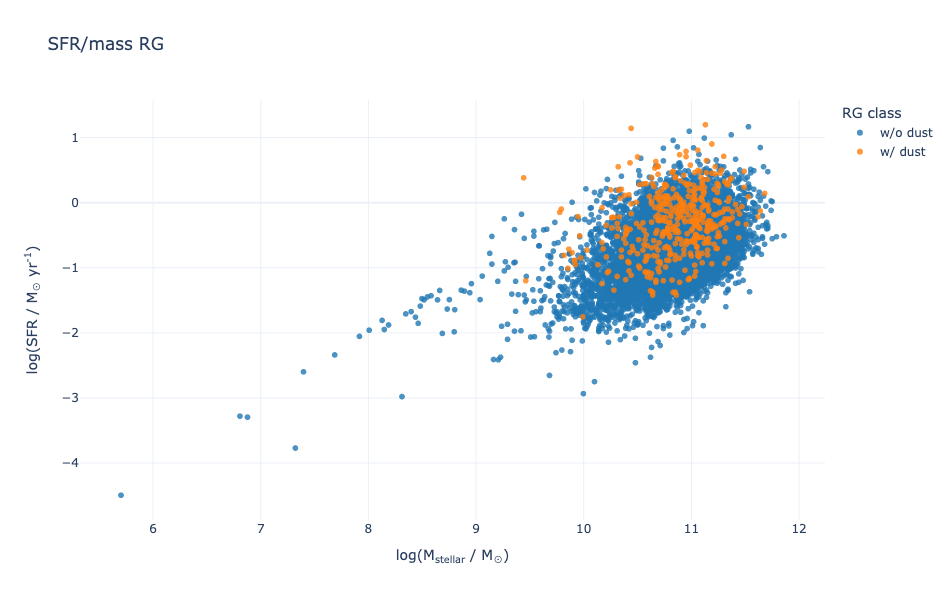

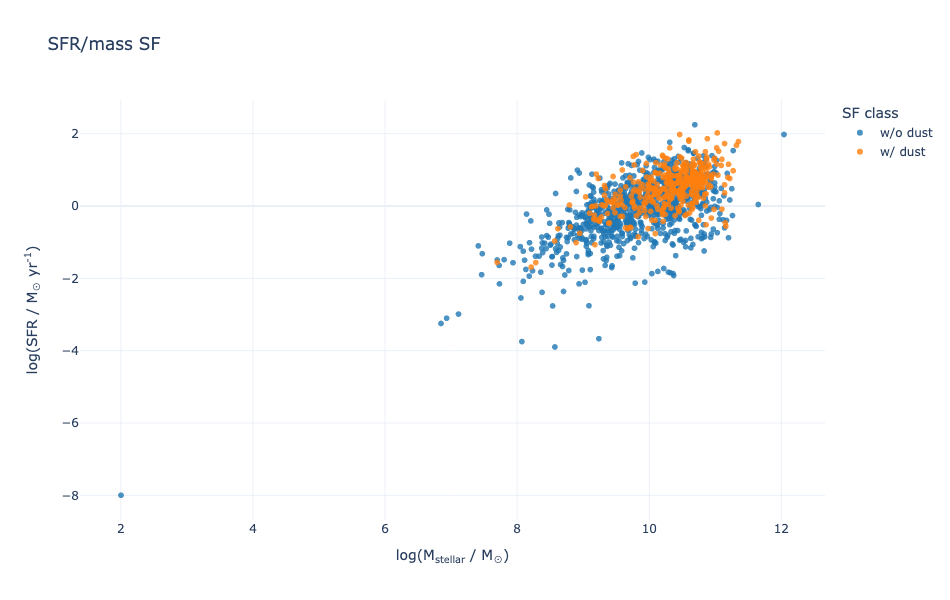

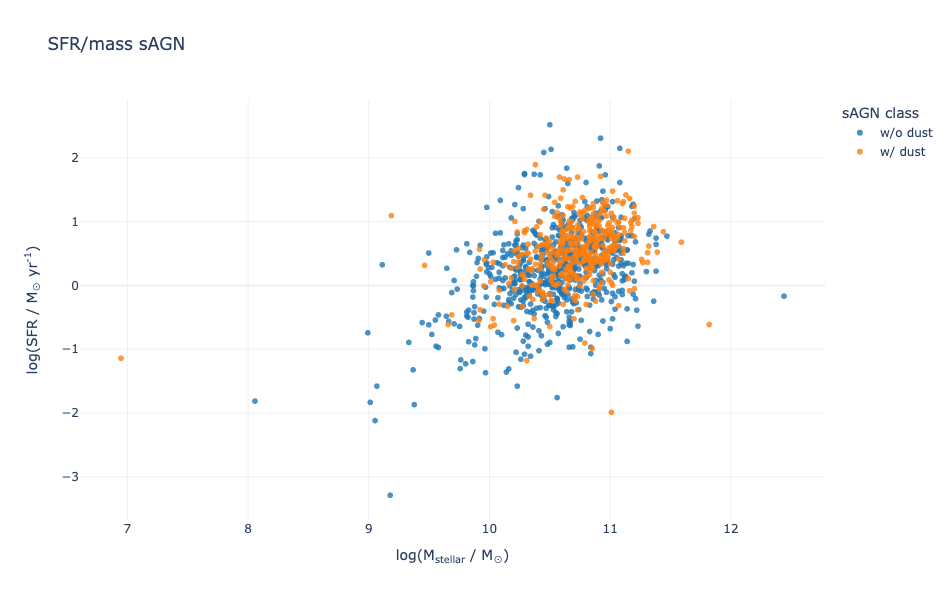

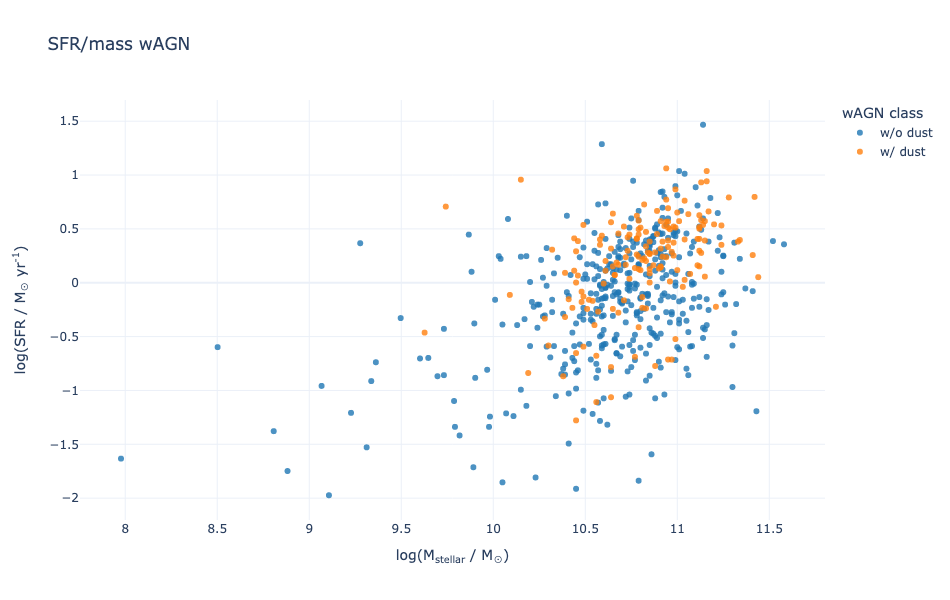

In [ ]:
for cls in ['ELR', 'LLR', 'RG', 'SF', 'sAGN', 'wAGN']:
    data_view = data[data['oleh_WHAN'] == cls].sort_values(by='przemo_dust', ascending=False)
    fig = px.scatter(data_view,
                 x='magphys_mass_stellar_percentile50',
                 y='magphys_SFR_0_1Gyr_percentile50',
                 color='przemo_dust',
                 hover_name='magphys_CATAID',
                 labels={**labels, 'przemo_dust': '%s class' % cls},
                 opacity=0.8,
                 width=950,
                 height=600,
                 color_discrete_sequence=px.colors.qualitative.D3,
                 title='SFR/mass %s' % cls)
    fig.show(plot_mode)

## stellar mass *as a func of* redshift

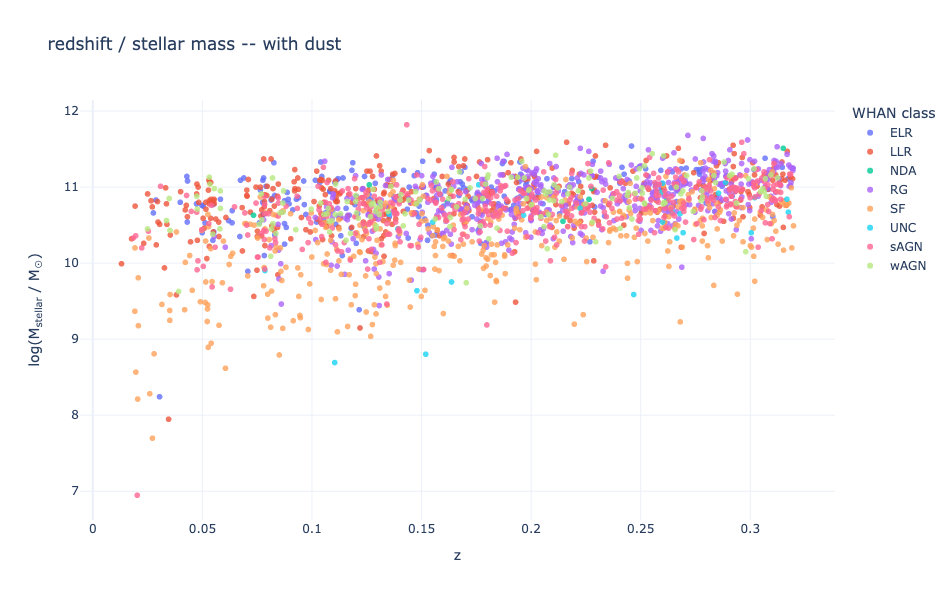

In [ ]:
fig = px.scatter(w_dust,
                 y='magphys_mass_stellar_percentile50',
                 x='oleh_Z',
                 color='oleh_WHAN',
                 hover_name='magphys_CATAID',
                 labels=labels,
                 title='redshift / stellar mass -- with dust',
                 opacity=0.8,
                 width=950,
                 height=600)
fig.show(plot_mode)

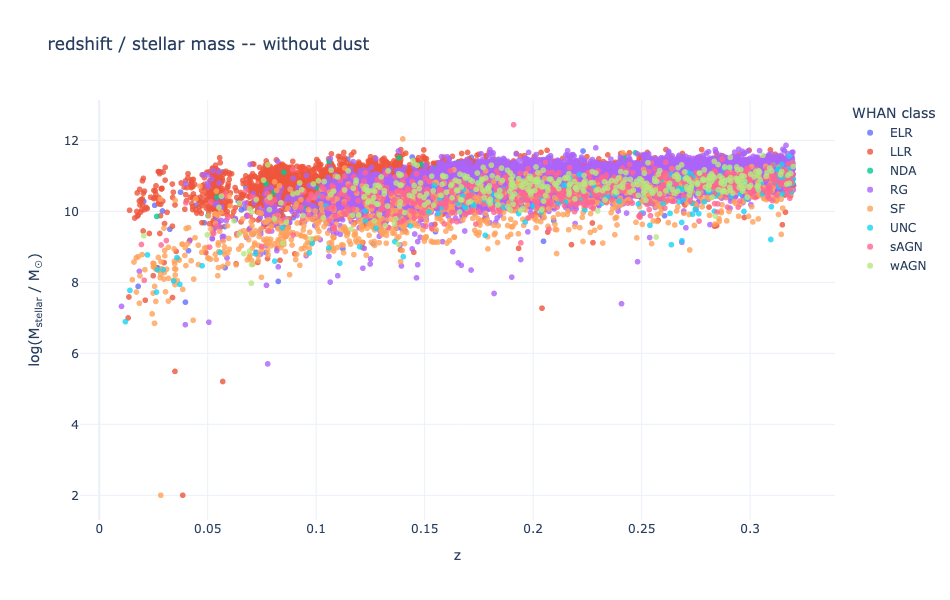

In [ ]:
fig = px.scatter(wo_dust,
                 y='magphys_mass_stellar_percentile50',
                 x='oleh_Z',
                 color='oleh_WHAN',
                 hover_name='magphys_CATAID',
                 labels=labels,
                 title='redshift / stellar mass -- without dust',
                 opacity=0.8,
                 width=950,
                 height=600)
fig.show(plot_mode)

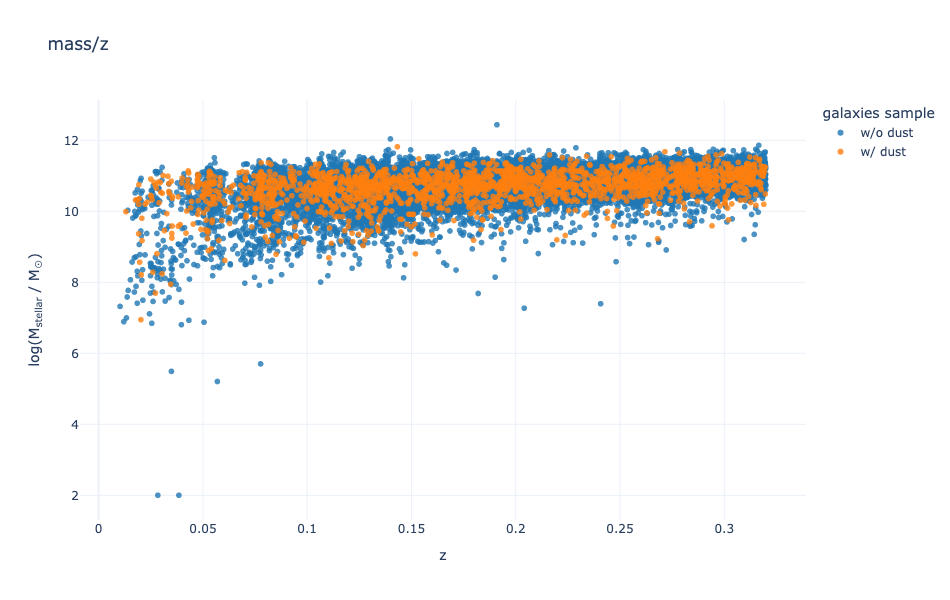

In [ ]:
fig = px.scatter(data,
                 y='magphys_mass_stellar_percentile50',
                 x='oleh_Z',
                 color='przemo_dust',
                 hover_name='magphys_CATAID',
                 labels=labels,
                 opacity=0.8,
                 width=950,
                 height=600,
                 color_discrete_sequence=px.colors.qualitative.D3,
                 title='mass/z')
fig.show(plot_mode)

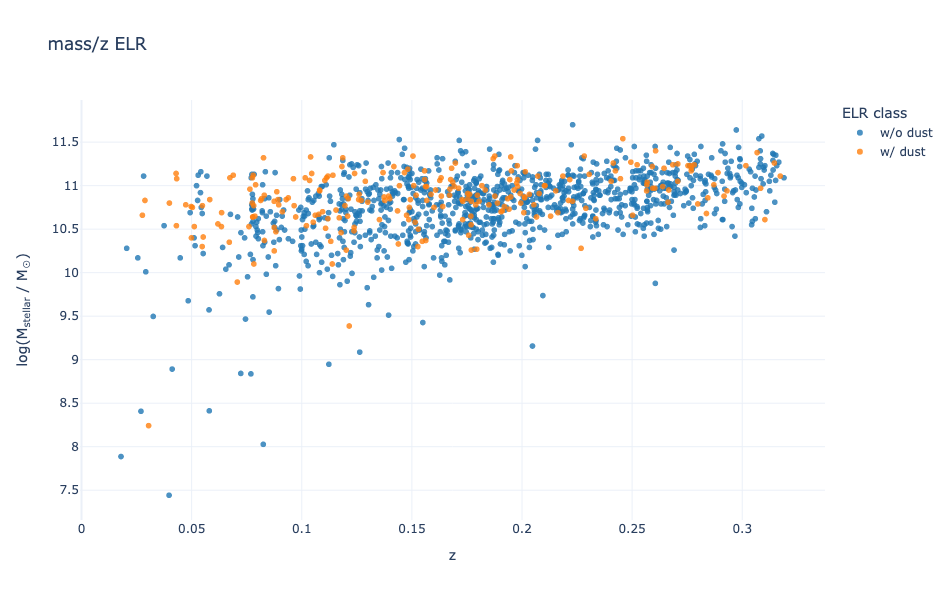

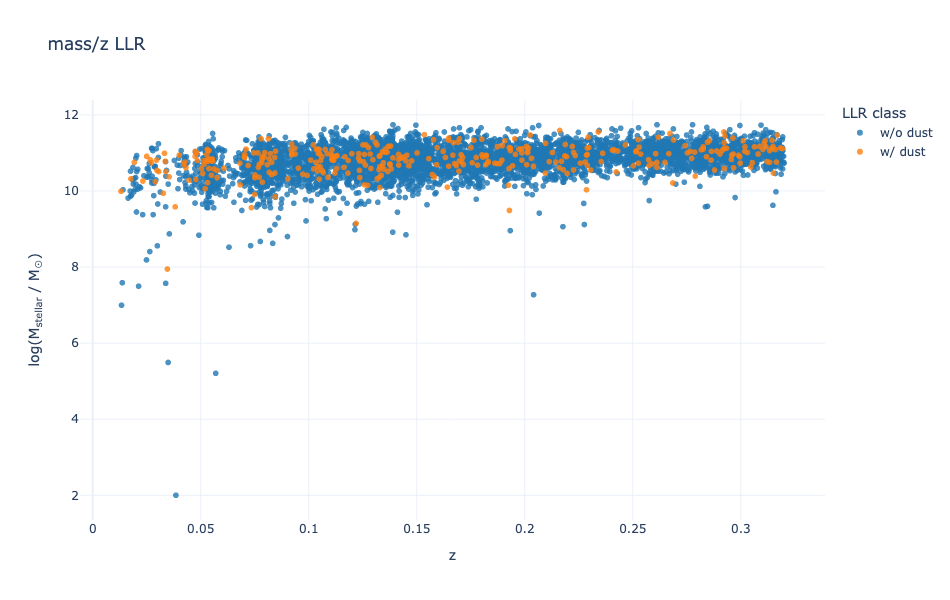

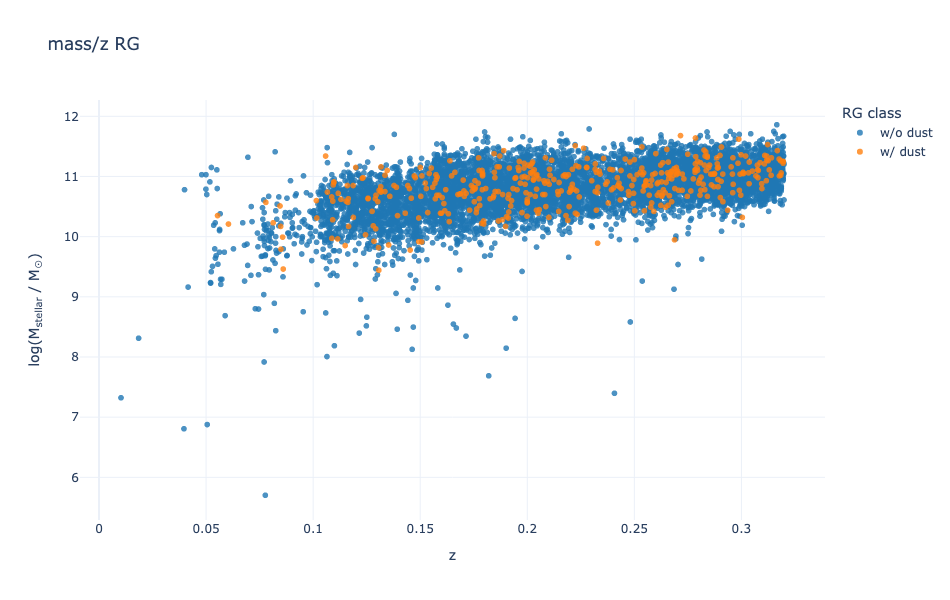

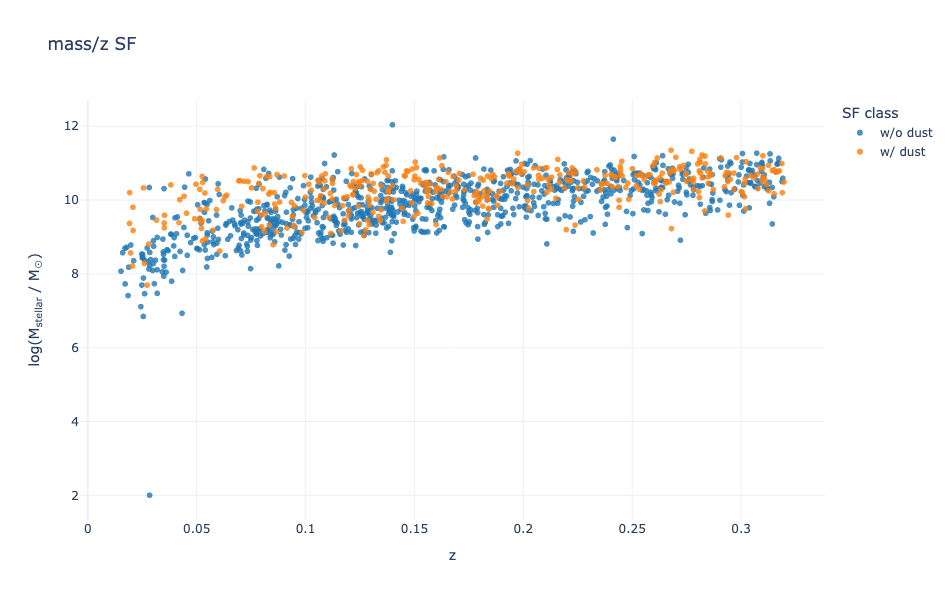

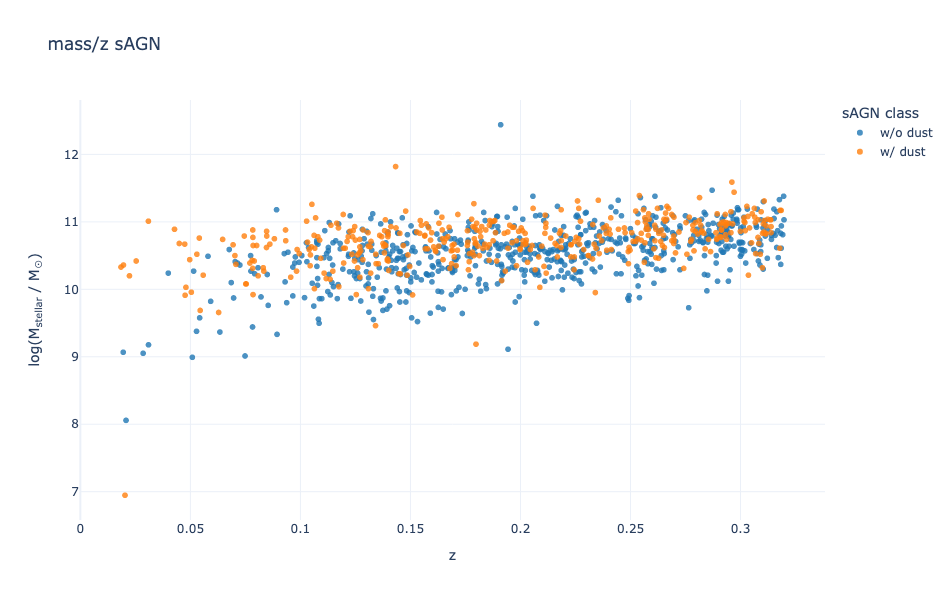

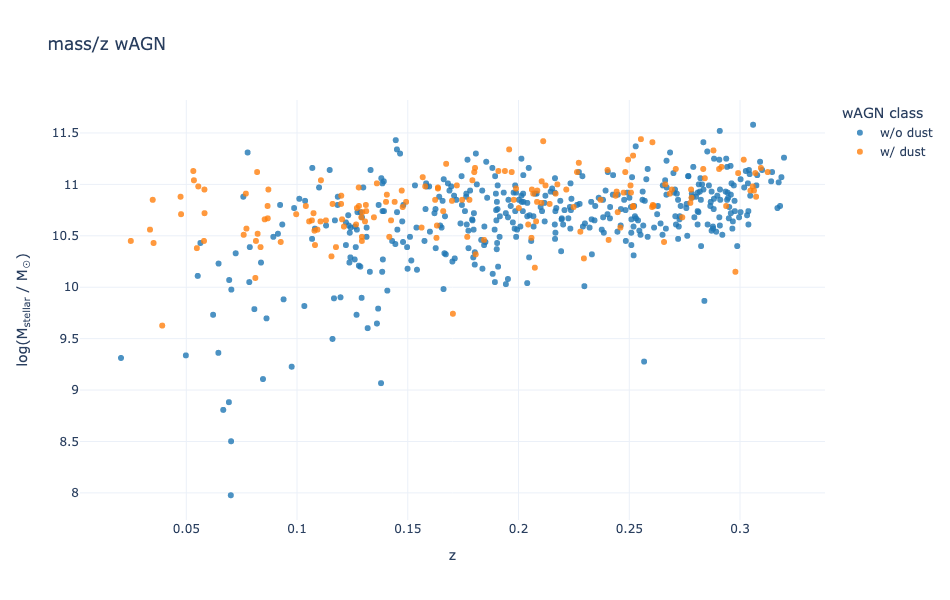

In [ ]:
for cls in ['ELR', 'LLR', 'RG', 'SF', 'sAGN', 'wAGN']:
    data_view = data[data['oleh_WHAN'] == cls].sort_values(by='przemo_dust', ascending=False)
    fig = px.scatter(data_view,
                 y='magphys_mass_stellar_percentile50',
                 x='oleh_Z',
                 color='przemo_dust',
                 hover_name='magphys_CATAID',
                 labels={**labels, 'przemo_dust': '%s class' % cls},
                 opacity=0.8,
                 width=950,
                 height=600,
                 color_discrete_sequence=px.colors.qualitative.D3,
                 title='mass/z %s' % cls)
    fig.show(plot_mode)

## SF class w/ dust seems to have higher stellar mass on average -- TODO look into

## RG really start at 0.1 z

## LLR have gaps around 0.04 z and 0.06 z

## light-weighted age *as a function of* mass?

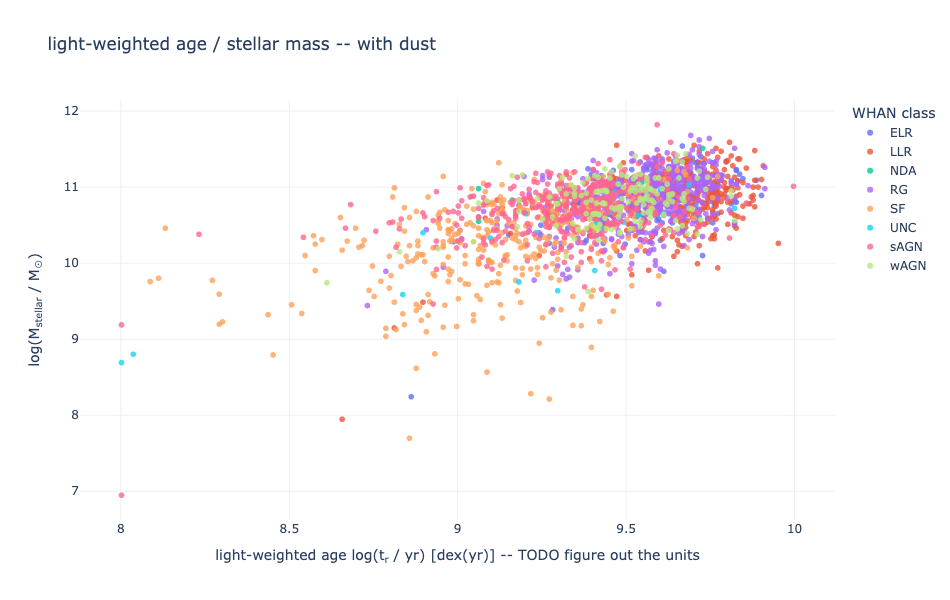

In [ ]:
fig = px.scatter(w_dust,
                 y='magphys_mass_stellar_percentile50',
                 x='magphys_ager_percentile50',
                 color='oleh_WHAN',
                 hover_name='magphys_CATAID',
                 labels=labels,
                 title='light-weighted age / stellar mass -- with dust',
                 opacity=0.8,
                 width=950,
                 height=600)
fig.show(plot_mode)

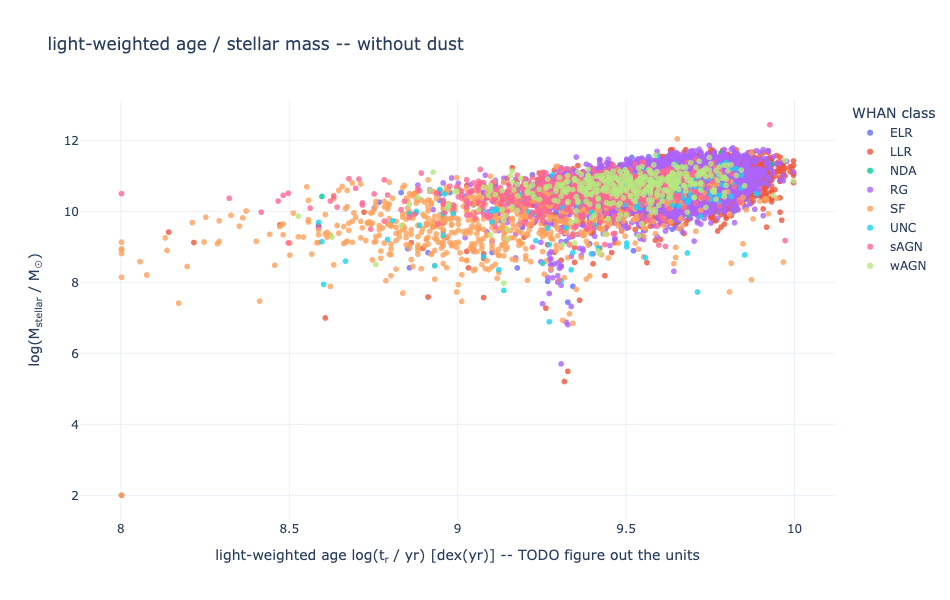

In [ ]:
fig = px.scatter(wo_dust,
                 y='magphys_mass_stellar_percentile50',
                 x='magphys_ager_percentile50',
                 color='oleh_WHAN',
                 hover_name='magphys_CATAID',
                 labels=labels,
                 title='light-weighted age / stellar mass -- without dust',
                 opacity=0.8,
                 width=950,
                 height=600)
fig.show(plot_mode)

## TODO dusty RGs have a drop in mass around 9.3, why? (see below)

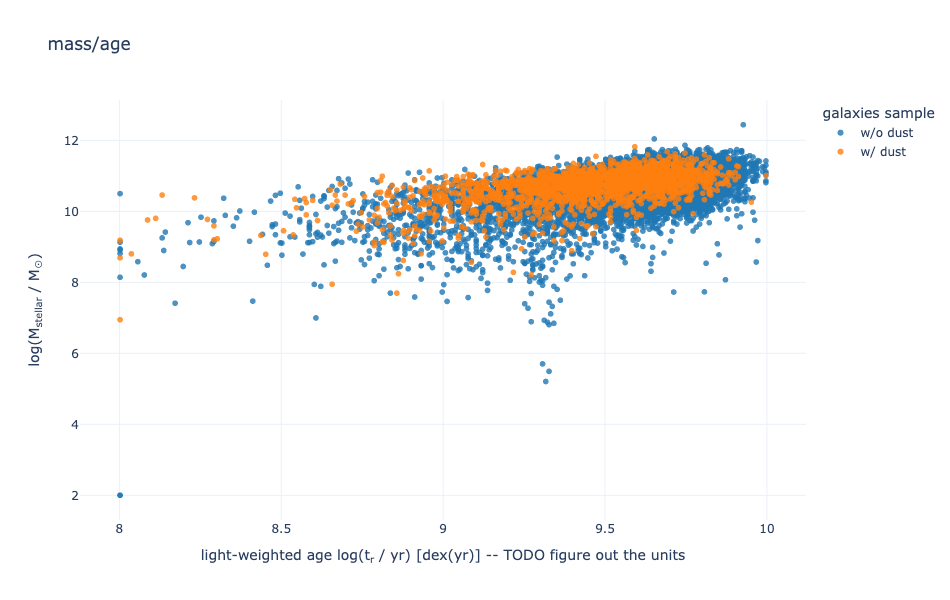

In [ ]:
fig = px.scatter(data,
                 y='magphys_mass_stellar_percentile50',
                 x='magphys_ager_percentile50',
                 color='przemo_dust',
                 hover_name='magphys_CATAID',
                 labels=labels,
                 opacity=0.8,
                 width=950,
                 height=600,
                 color_discrete_sequence=px.colors.qualitative.D3,
                 title='mass/age')
fig.show(plot_mode)

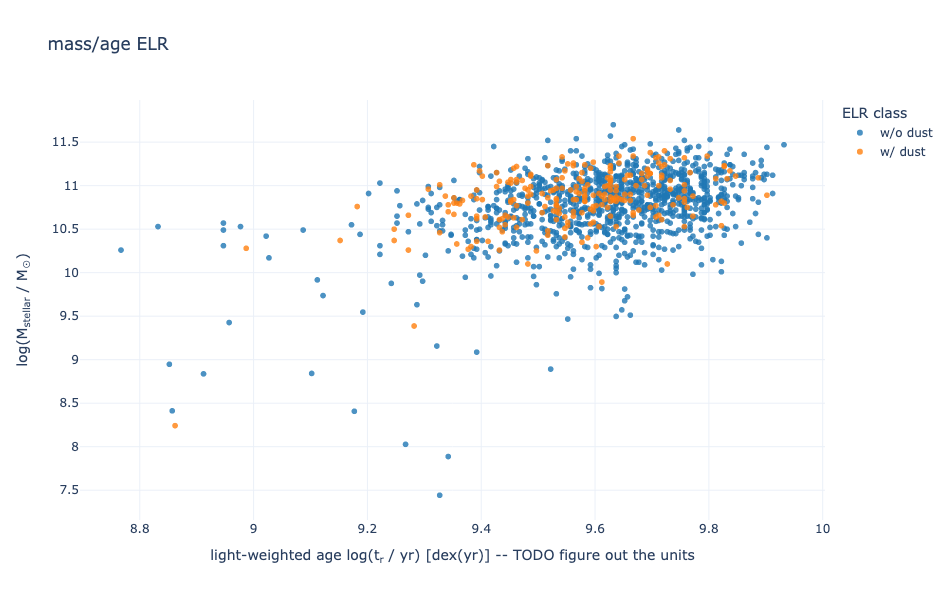

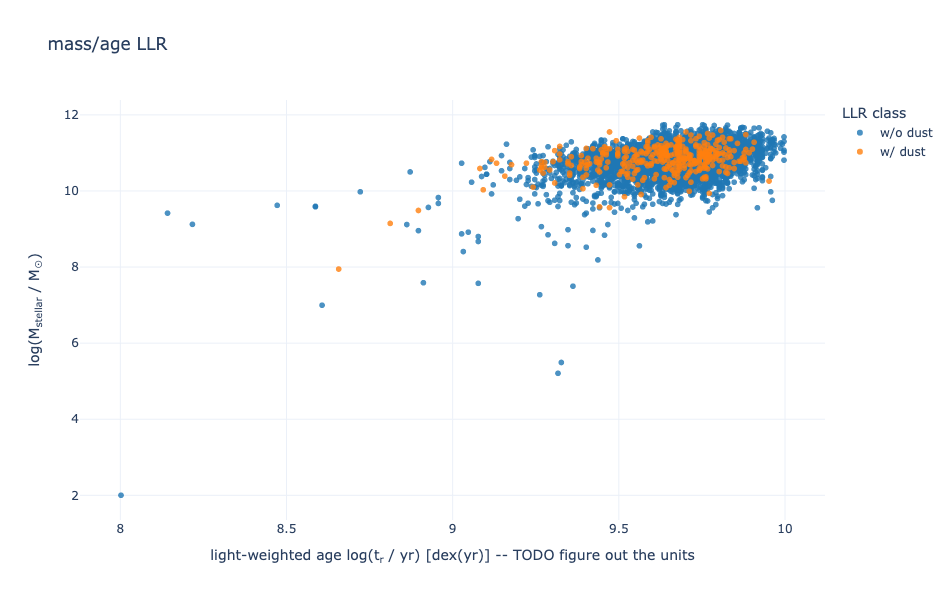

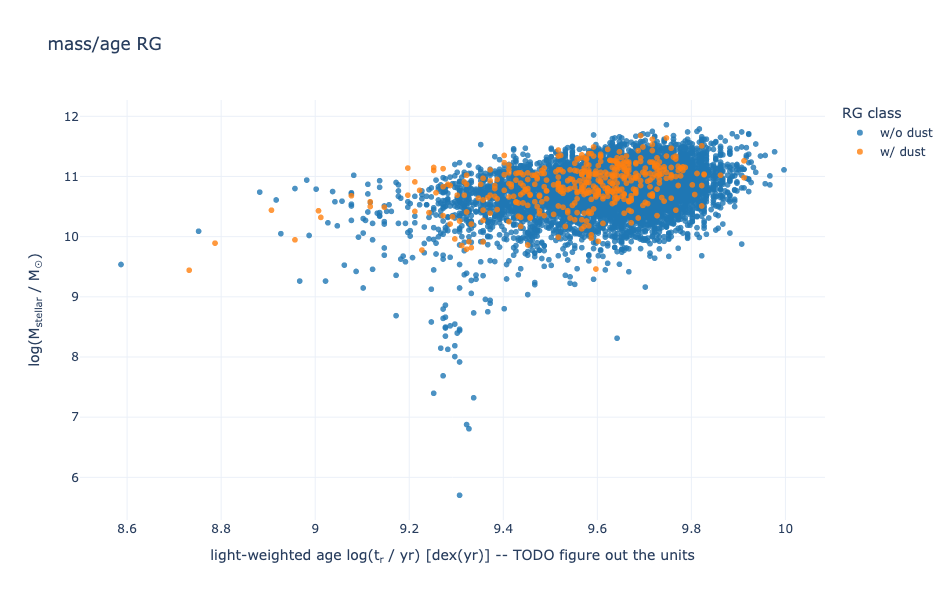

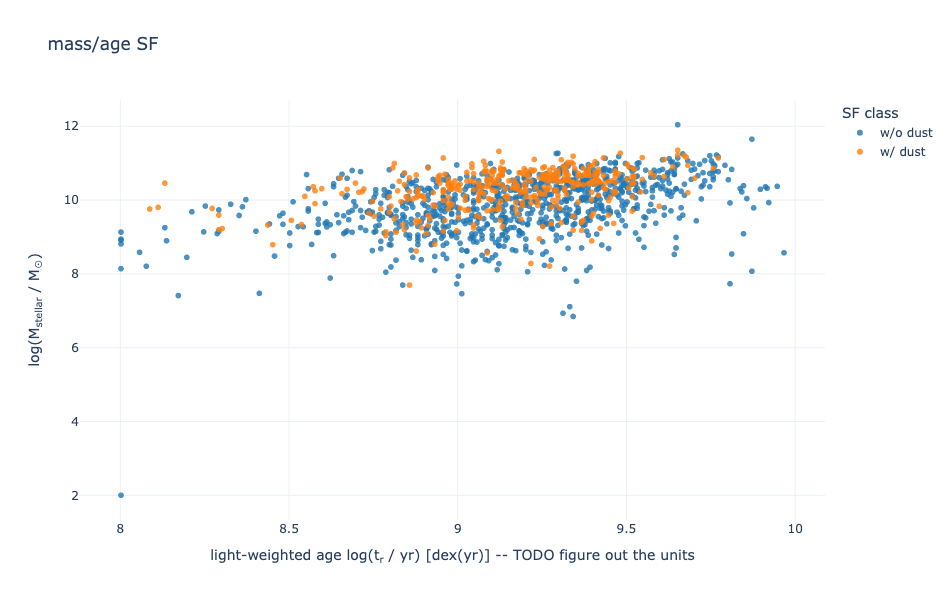

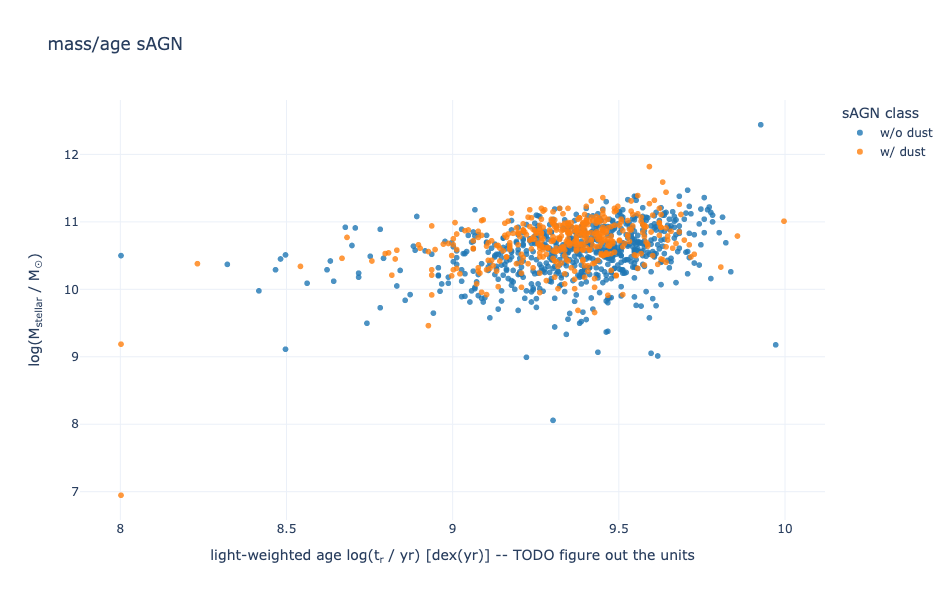

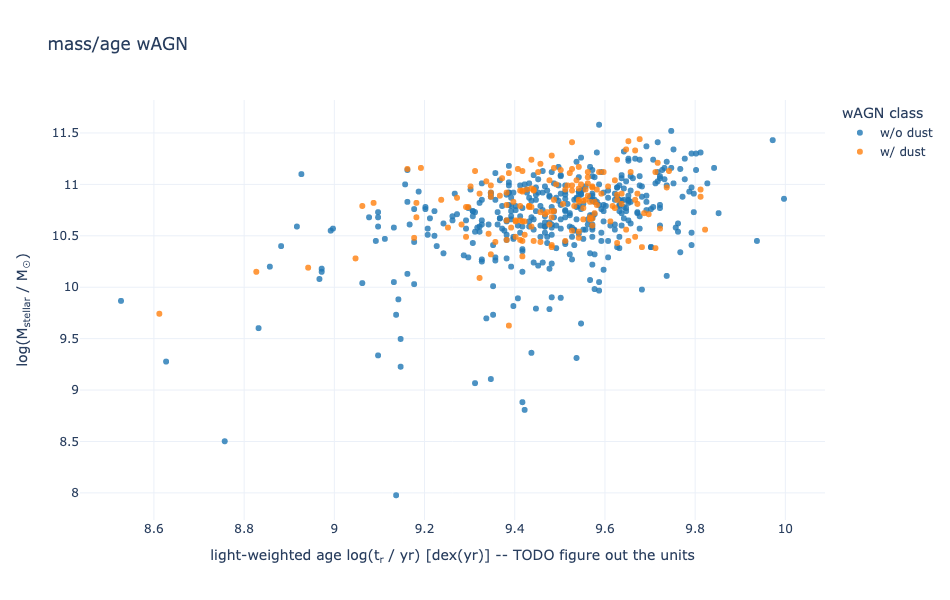

In [ ]:
for cls in ['ELR', 'LLR', 'RG', 'SF', 'sAGN', 'wAGN']:
    data_view = data[data['oleh_WHAN'] == cls].sort_values(by='przemo_dust', ascending=False)
    fig = px.scatter(data_view,
                 y='magphys_mass_stellar_percentile50',
                 x='magphys_ager_percentile50',
                 color='przemo_dust',
                 hover_name='magphys_CATAID',
                 labels={**labels, 'przemo_dust': '%s class' % cls},
                 opacity=0.8,
                 width=950,
                 height=600,
                 color_discrete_sequence=px.colors.qualitative.D3,
                 title='mass/age %s' % cls)
    fig.show(plot_mode)

## TODO start looking at count2 graph differences